In [2]:
# Import and install Libraries
import pandas as pd  # For data manipulation and analysis
import yfinance as yf  # For downloading historical stock data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#Retrieve Historical Stock Data for Apple.Inc (AAPL) frrom January 1, 2010 to December 31, 2022
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2022-12-31"
data = yf.download(ticker, start=start_date, end=end_date)


/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_43317/599999455.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [8]:
# Explore the data
type(data)  # Check the type of the data
data.head()  # Display the first few rows of the data
data.info()  # Get information about the data
data.describe()  # Get statistical summary of the data
data.shape  # Get the shape of the data (rows, columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (High, AAPL)    3272 non-null   float64
 2   (Low, AAPL)     3272 non-null   float64
 3   (Open, AAPL)    3272 non-null   float64
 4   (Volume, AAPL)  3272 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.4 KB


(3272, 5)

In [ ]:
# Clean the Data
data = data.dropna()  # Remove rows with missing values  
data = data.drop_duplicates()  # Remove duplicate rows

In [ ]:
# See if data changed
data.shape
# no change in data shape after cleaning

(3272, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

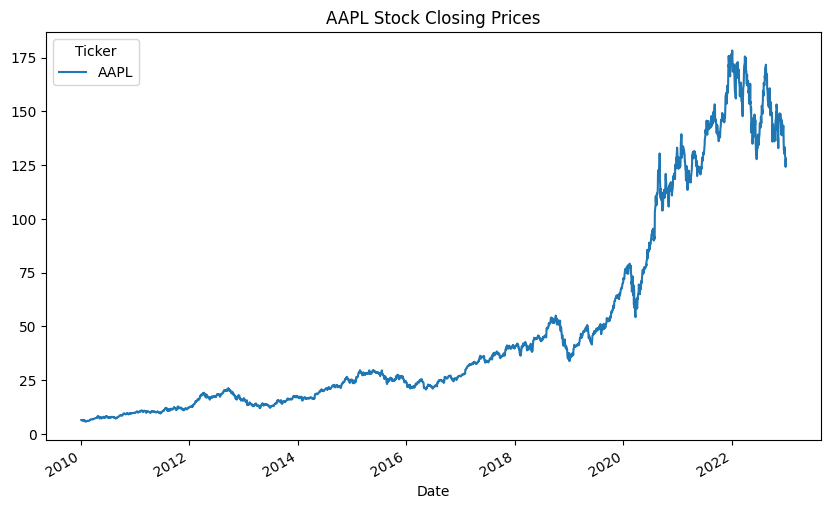

In [11]:
# Exploratory Data Analysis (EDA)
#Visualize the Stock Prices
data['Close'].plot(title='AAPL Stock Closing Prices', figsize=(10, 6))
plt.show

In [12]:
# Get statistical summary of the data
print(data.describe())

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   3272.000000  3272.000000  3272.000000  3272.000000  3.272000e+03
mean      48.734500    49.257725    48.172267    48.711389  2.562707e+08
std       47.113218    47.690195    46.493790    47.085333  2.225648e+08
min        5.759781     5.878243     5.705796     5.769376  3.519590e+07
25%       16.379215    16.565673    16.247085    16.378530  1.023541e+08
50%       26.979361    27.194199    26.846943    27.038867  1.666698e+08
75%       54.136752    54.812754    53.745656    54.290144  3.456643e+08
max      178.270309   179.181185   175.439667   178.877557  1.880998e+09


In [13]:
# Moving Averages and Basic Techinical Indicators
# Calculate 10-day and 50 -day simple moving averages for the stock
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


In [14]:
data['MA10'].tail()


Date
2022-12-23    134.805302
2022-12-27    133.380794
2022-12-28    131.466669
2022-12-29    130.126878
2022-12-30    129.479643
Name: MA10, dtype: float64

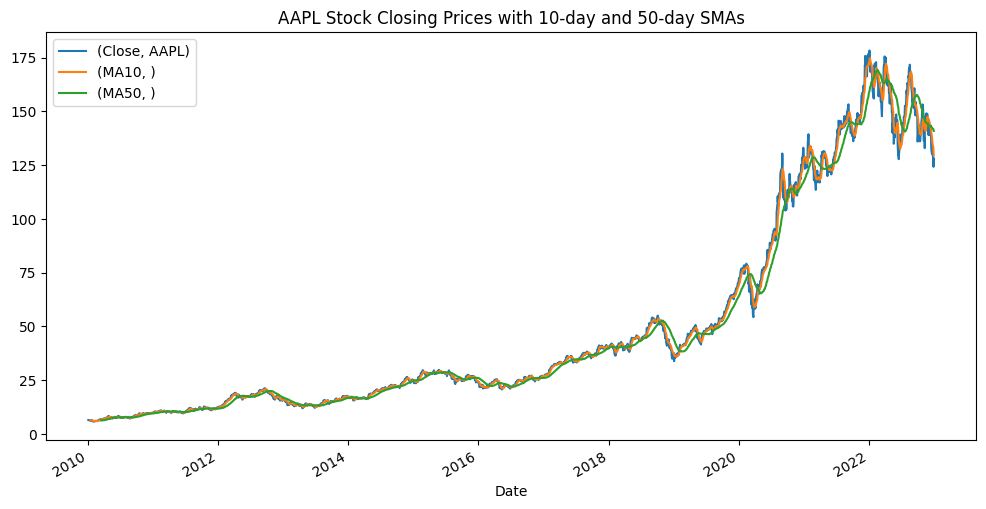

In [15]:
# Plot  the calculated SMAs along with the closing price 
data[['Close', 'MA10', 'MA50']].plot(title='AAPL Stock Closing Prices with 10-day and 50-day SMAs', figsize=(12, 6))
plt.legend()
plt.show()


In [17]:
# Implementing a Moving Average Crossover Strategy
# Generate trading signals based on the crossover of the 10-day and 50-day SMAs
data['Signal']= np.where(data['MA10'] > data['MA50'], 1, 0)  # Buy signal when MA10 > MA50
data['Position'] = data['Signal'].diff()  # Capture the change in signals to identify buy/sell points

In [18]:
data['Position'].unique()

array([nan,  0.,  1., -1.])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3272 non-null   float64
 1   (High, AAPL)    3272 non-null   float64
 2   (Low, AAPL)     3272 non-null   float64
 3   (Open, AAPL)    3272 non-null   float64
 4   (Volume, AAPL)  3272 non-null   int64  
 5   (MA10, )        3263 non-null   float64
 6   (MA50, )        3223 non-null   float64
 7   (Signal, )      3272 non-null   int64  
 8   (Position, )    3271 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 255.6 KB


/var/folders/vg/q66t8nnd5g5gwvf0w_gk_h7w0000gn/T/ipykernel_43317/3766340511.py:4: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')


<Figure size 1000x500 with 0 Axes>

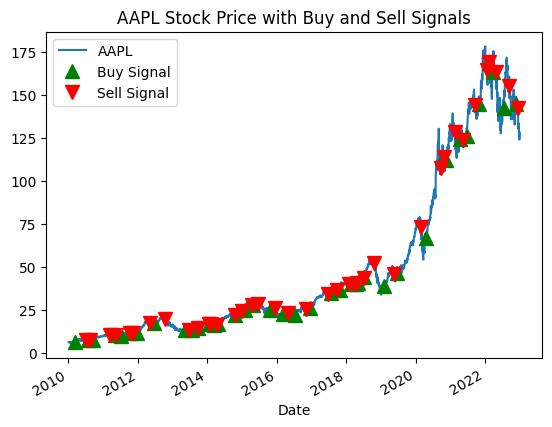

In [20]:
# Visualize the stategy signals on the stock price chart
plt.figure(figsize=(10,5))
data['Close'].plot(label='AAPL Moving Average Crossover Stategy')
plt.plot(data[data['Position'] == 1].index, data['MA10'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['MA10'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('AAPL Stock Price with Buy and Sell Signals')
plt.legend()
plt.show()

In [21]:
# Backtesting the Strategy
# Prepare  data for backtesting
# Initialize the portfolio DataFrame with positions
portfolio= pd.DataFrame(index=data.index)
portfolio['Position'] = data['Position']
if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']
portfolio['Adj Close'] = data['Adj Close']
portfolio['Position'] = data['Position']

portfolio['Holdings'] = portfolio['Position'].cumsum() * portfolio['Adj Close'].fillna(0)
initial_cash= 100000  # Starting with $100,000
portfolio['Cash'] = initial_cash - (data['Position'] * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change().fillna(0)
portfolio.tail(50)

,Position,Adj Close,Holdings,Cash,Total,Returns
Date,,,,,,
2022-10-20,0.0,141.025024,0.000000,100094.211179,100094.211179,0.000000
2022-10-21,0.0,144.841003,0.000000,100094.211179,100094.211179,0.000000
2022-10-24,0.0,146.985046,0.000000,100094.211179,100094.211179,0.000000
2022-10-25,0.0,149.827362,0.000000,100094.211179,100094.211179,0.000000
2022-10-26,0.0,146.886703,0.000000,100094.211179,100094.211179,0.000000
2022-10-27,0.0,142.411758,0.000000,100094.211179,100094.211179,0.000000
2022-10-28,0.0,153.171310,0.000000,100094.211179,100094.211179,0.000000
2022-10-31,0.0,150.810867,0.000000,100094.211179,100094.211179,0.000000
2022-11-01,0.0,148.165253,0.000000,100094.211179,100094.211179,0.000000


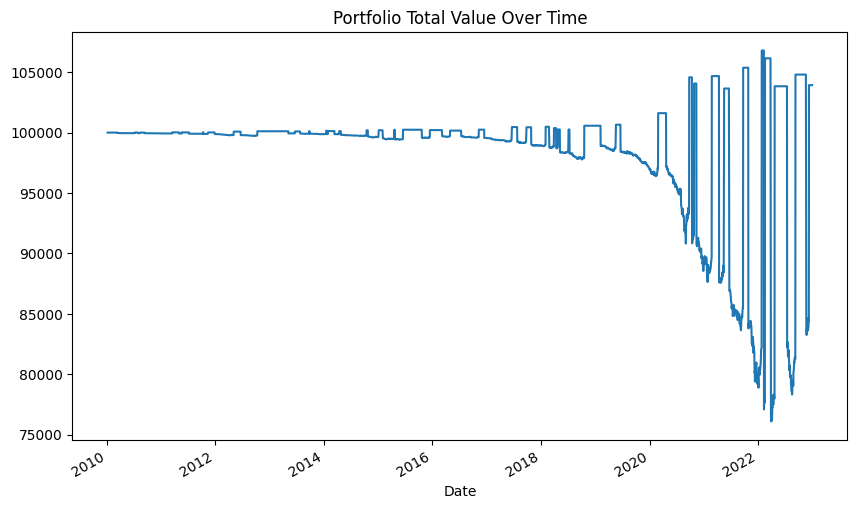

In [ ]:
# Calculate the total value
initial_capital = 100000  # Starting capital
portfolio['Cash'] = initial_capital - (portfolio['Holdings'].diff() * data['Adj Close']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']

portfolio['Total'].plot(title='Portfolio Total Value Over Time', figsize=(10, 6))
plt.show()